# Is the Shape of fMRI Hemodynamic Responses Relevant for Studying Neural Function
## Abstract
Variations in the shape of the hemodynamic function is typically considered strictly dependant on vascular-related factors and irrelevant to the study of neural function--neural activity in a given piece of brain tissue triggers a stereotypical reponse time course. Recent work however suggest the temporal shape of a response varies according to stimulus or task conditions, suggesting different shapes may be diagnostic of different underlying neural processes.

[working model with inhibition]

[confirms prediction of the model only for overlaid stimuli] Here show that one temporal shape parameter, the delay of the fMRI BOLD response, is increased when competing visual stimuli are overlayed, but not unaffeted when stimuli are presented alone.

We interpret our results as evidence that the hemodynamic delay may reflect the balance between excitation and inhibition involve in local neural processes.

With further experimental validation, this could bring fMRI methods beyond the mapping of brain functions and closer to more clinically-relevant descriptions neural processes within a given brain tissue.
## Context
## Working Model and Hypothesis

## Experimental Approach and Data Acquisition
### Stimuli
### Functional MRI Paradigm
In each run, stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

In [1]:
clear all
%% Dependencies
addpath(genpath(fullfile(pwd,'matlabFun')));
verbose = 0; % prints more info

%% Between-session feature selection parameters
% Activated voxels
featSel_bSess.activation.doIt = 1;
featSel_bSess.activation.fitType = 'fixed';
featSel_bSess.activation.threshType = 'p';
featSel_bSess.activation.threshVal = 0.05;
% Vein voxels
featSel_bSess.vein.doIt = 1;
featSel_bSess.vein.source = 'fullModelResid';% 'reducedModelResid' (stimulus-driven signal included in std) or 'fullModelResid (stimulus-driven signal excluded in std)'
featSel_bSess.vein.percentile = 20;
% Discriminant voxels
featSel_bSess.discrim.doIt = 1;
%% Display parameters
figOption.save = 1; % save all figures
figOption.subj = 1; % subjInd-> plots participants subjInd; +inf-> plots all participant (if verbose==0, will only plot subjInd==1 but still produce and save all the other figures)

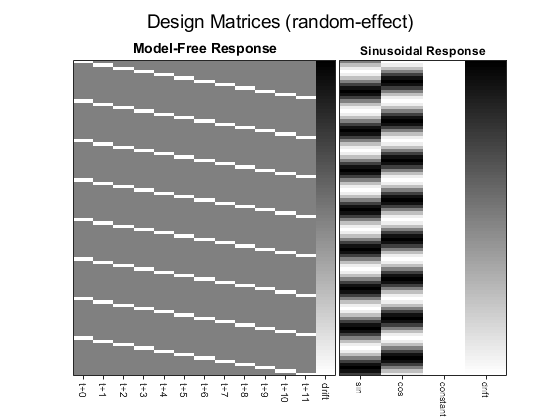

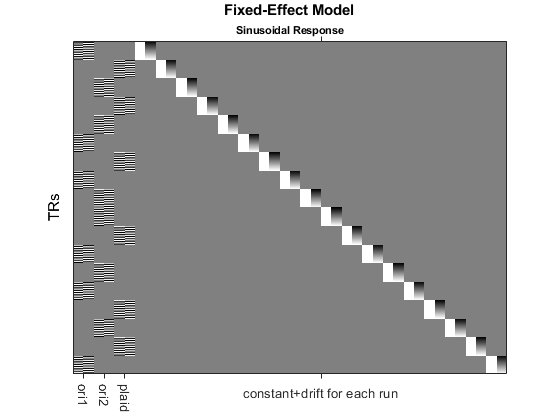

In [2]:
runFit(verbose)

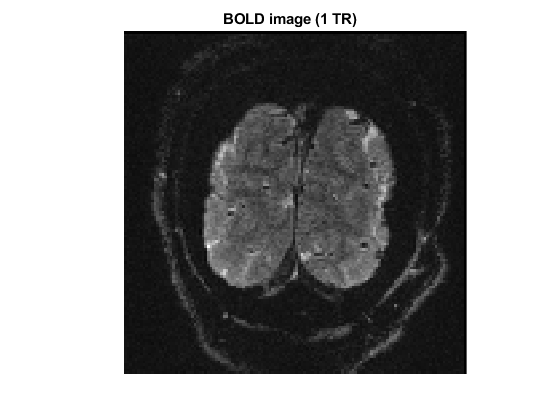

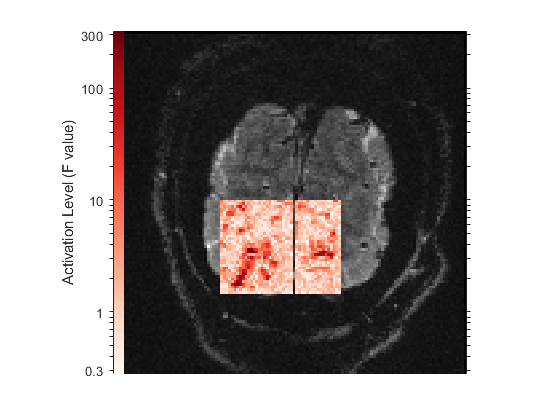

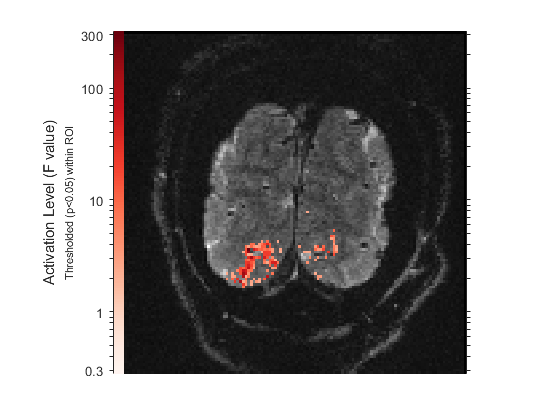

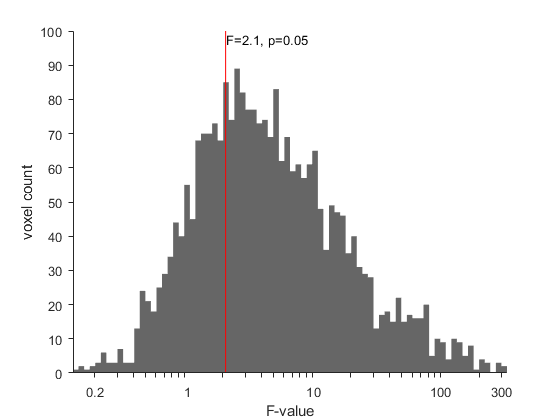

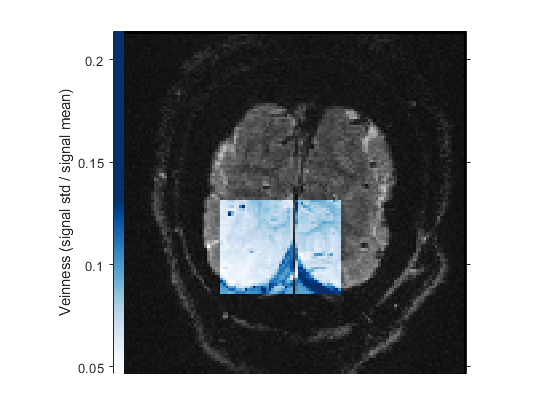

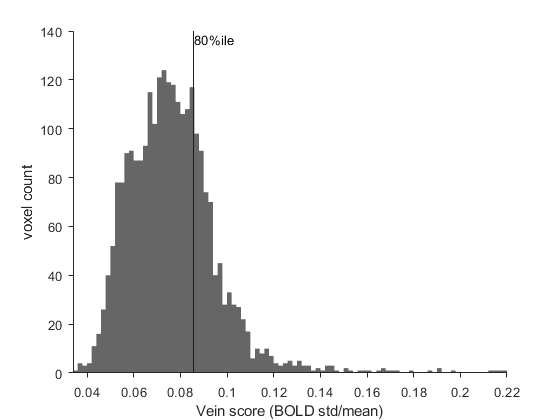

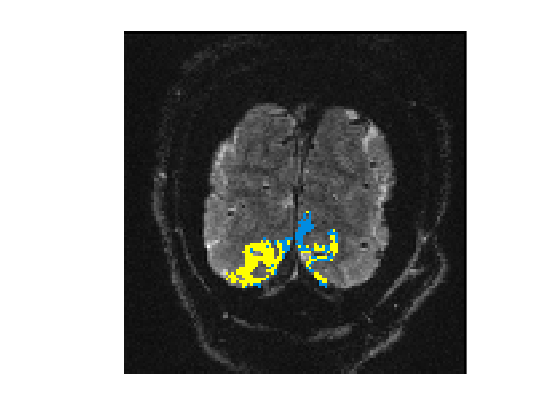

In [3]:
preprocAndShowMasks(featSel_bSess,figOption,verbose)

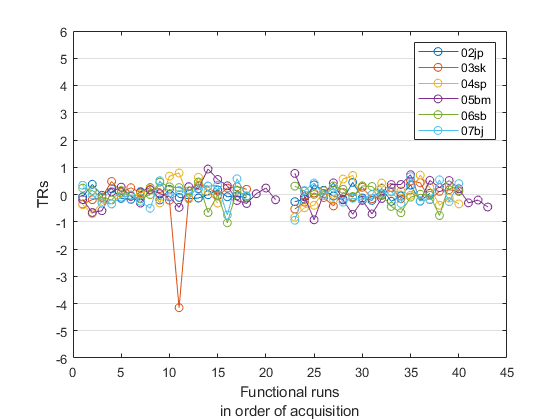

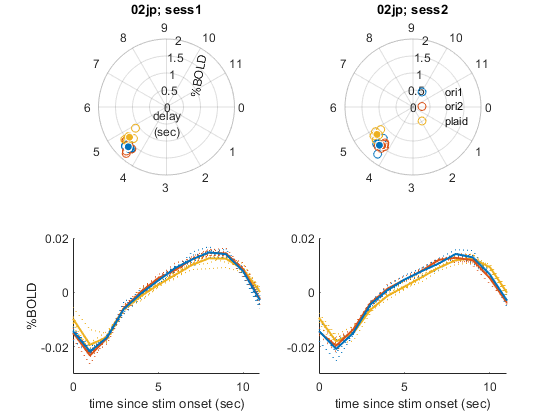

In [4]:
inspectSubjAndExclude(figOption,verbose)

## Prediction 1: Competing stimuli evoke a more delayed HR, compared to stimuli presented alone.

### Compare responses evoked by different stimuli

***
delay (plaid-ori) = 0.160s
delay (ori2-ori1) = 0.061s
amp (plaid-ori) = -0.037%BOLD
amp (ori2-ori1) = -0.025%BOLD
***
---------------
Cartesian Space
---------------
Ori vs Plaid:
Hotelling's T^2 multivariate test
 T^2=8.38
 p=0.14
Ori1 vs Ori2:
 Hotelling's T^2 multivariate test
 T^2=0.89; p=0.72
---------------
Polar Amplitude
---------------
Ori vs Plaid (one-tailed):
 Student's t-test
 t=0.98; p=0.19
 Wilcoxon signed rank test
 signed rank=14.00; p=0.28
Ori1 vs Ori2:
 Student's t-test
 t=0.87; p=0.42
 Wilcoxon signed rank test
 signed rank=14.00; p=0.56
Ori1 vs Ori2 vs Plais (Friedman's test for K-related-samples):
Chi^2(df=32) = 1.3
p            = 0.513
-----------
Polar Delay
-----------
Ori vs Plaid (one-tail):
 Student's t-test
 t=4.15; p=0.00
 Wilcoxon signed rank test
 signed rank=21.00; p=0.02
 Hotelling's test for angular means
 F=21.00; p=0.03
Ori1 vs Ori2:
 Student's t-test
 t=0.84; p=0.44
 Wilcoxon signed rank test
 signed rank=14.00; p=0.56
 Hotelling's test for ang

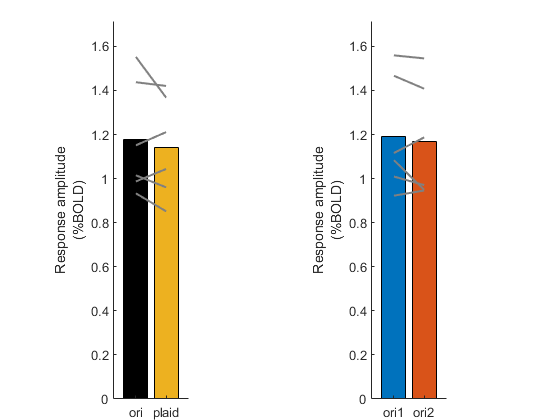

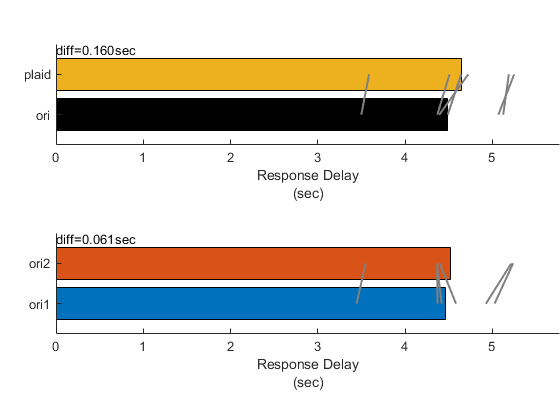

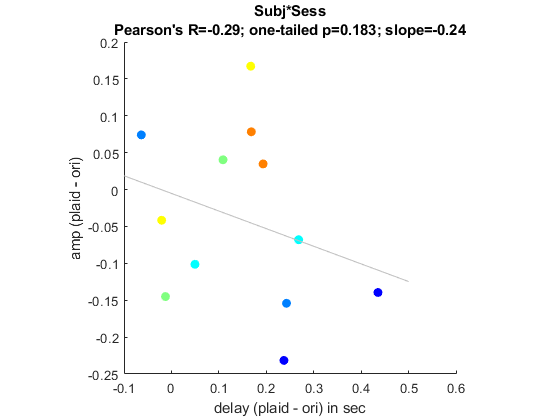

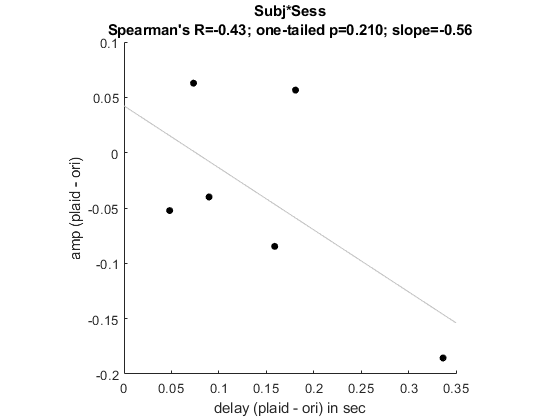

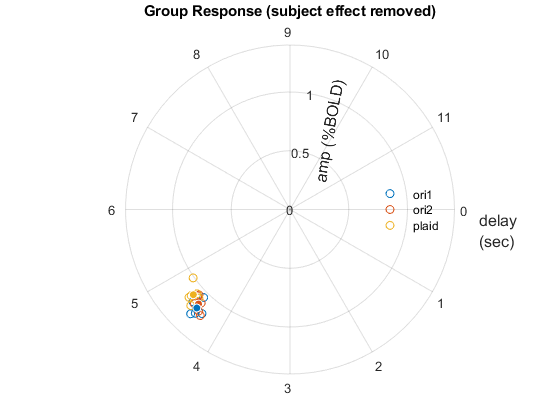

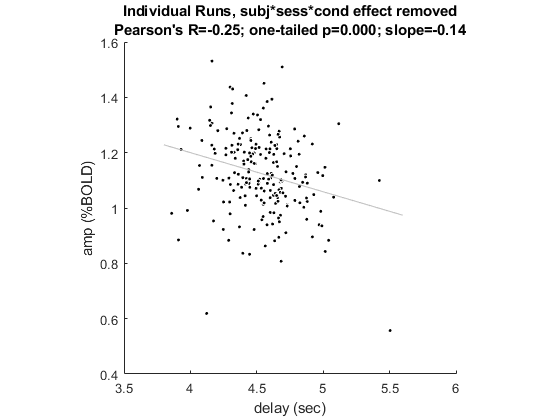

In [5]:
runGroupAnalysis_sin(figOption,verbose)

### Visualize the sinusoidal response in V1

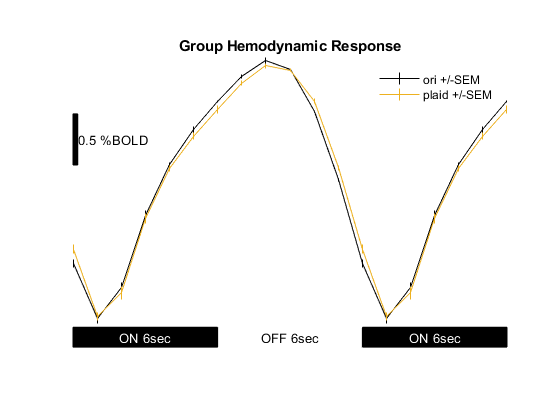

In [6]:
runGroupAnalysis_hr(figOption,verbose)

### Conclusion on Prediction 1
The inhibition involve by the overlayed presentation of orhtogonal grating increases the hemodynamic delay with little effect on the amplitude of the hemodynamic response. The excitation/inhibition balance is altered, not the overlay level of synaptic acticity.

## Prediction 2: Stimulus orientation can be predicted not only from the multivoxel pattern of BOLD responses, but also from the pattern of BOLD delays

cart VS cartReal:
signed rank = 10
one-sided p = 0.0625
cart VS cartReal:
permP (one-sided) = 0.18567
                   signed rank    signed rank one-tailed p     acc      bino p
                   ___________    ________________________    ______    ______

    cart              20.00                0.0313             62.68%    0.0009
    cartNoAmp         18.00                0.0781             58.45%    0.0178
    cartNoDelay       16.00                0.1563             59.15%    0.0116
    cartReal          13.00                0.0938             57.75%    0.0266




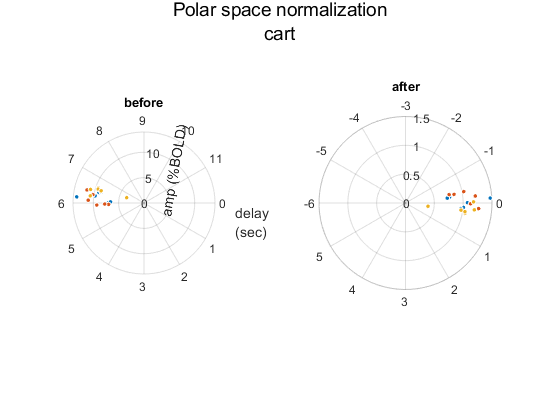

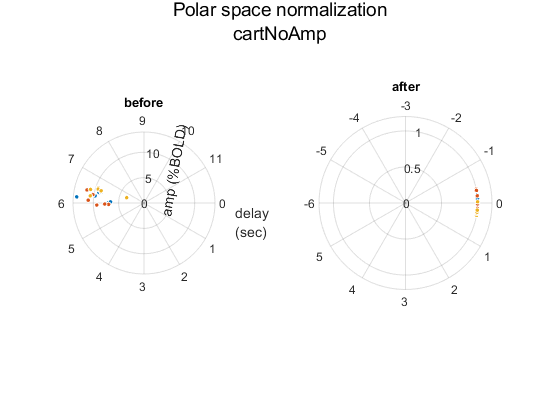

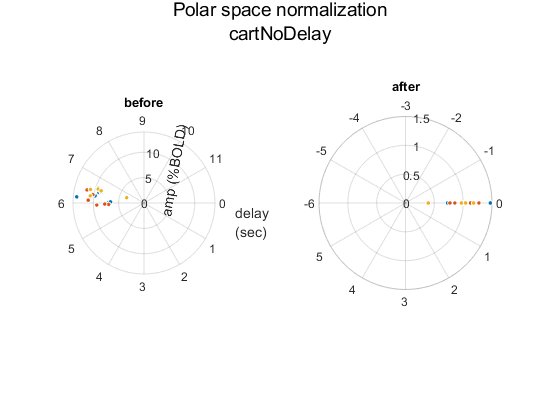

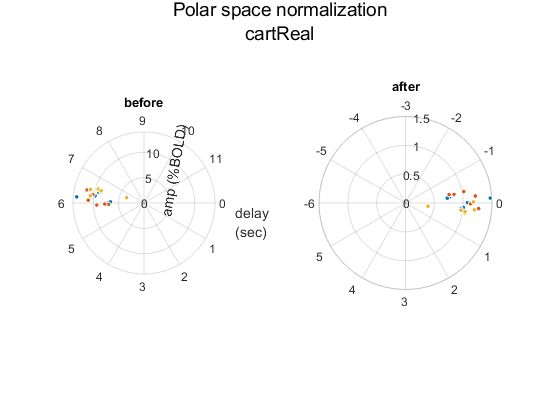

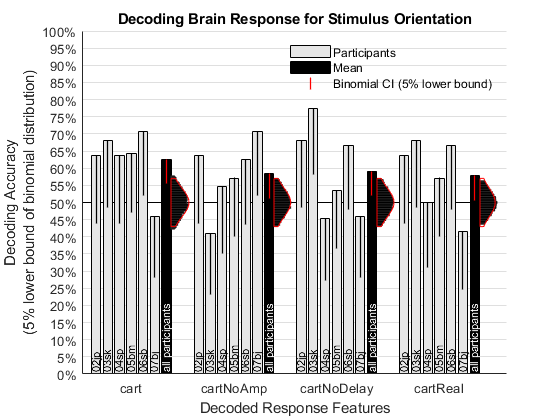

In [7]:
runAllDecoding(figOption,verbose)

### Conclusion on Prediction 2
Sensitivity of the paradigm confirmed.
But stimulus presented alone do not significantly affect the delay.
Neural inhibition activity related to cross-orientation suppression may only be sufficiently strong under situations where there is sufficient feed-forward drive to the inhibited neural population.

## Conclusion
Overlayed orthogonal gratings induced mutual ihibitory activity between two neural populations (alter the excitation/inhibition balance) that contribute the the fMRI response in a way that delays to measured response.

Gratings presented alone induce balanced levels of excitation and inhibition, leading to indiscriminable hemodynamic delays.